In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
# Membaca data dari file CSV
df = pd.read_csv('/content/drive/MyDrive/Portofolio Data Analytics/Pokemon Analysis/Pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [25]:
# Menampilkan Jumlah Baris dan Kolom
df.shape

(800, 12)

In [31]:
# Menampilkan Jumlah elemen di DataFrame
df.size

10400

In [27]:
# Menampilkan nama nama kolom
df.columns

Index(['Name', 'Type1', 'Type2', 'Total', 'HP', 'Attack', 'Defense', 'Sp-Atk',
       'Sp-Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [155]:
# Menampilkan informasi ringkas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [156]:
# Menampilkan jumlah nilai yang hilang
df.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [157]:
# Menghapus spasi dan mengganti titik pada nama kolom dengan karakter '-'
df.columns = df.columns.str.replace(' ','').str.replace('.','-')

# Mengatur kolom '#' sebagai indeks
df = df.set_index('#')

# Mengganti nilai NaN di kolom 'Type2' dengan string 'None'
df['Type2'].fillna('None',inplace=True)

# Menampilkan 5 baris pertama setelah pembersihan data
df.head()

,Name,Type1,Type2,Total,HP,Attack,Defense,Sp-Atk,Sp-Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False


In [159]:
# Mengecek kembali jumlah nilai yang hilang
df.isna().sum()

Name          0
Type1         0
Type2         0
Total         0
HP            0
Attack        0
Defense       0
Sp-Atk        0
Sp-Def        0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [11]:
# Menampilkan statistik deskriptif
df.describe()

,Total,HP,Attack,Defense,Sp-Atk,Sp-Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


EDA (eksploration Data Analytics)

800 414


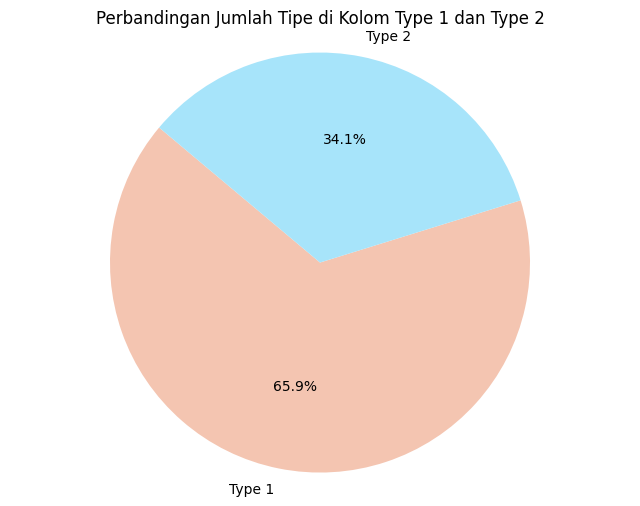

In [40]:
# Menghitung jumlah Pokemon yang memiliki nilai di kolom 'Type1'
type1_total = df['Type1'].notna().sum()

# Menghitung jumlah Pokemon yang memiliki nilai di kolom 'Type2', mengabaikan 'None'
type2_total = df['Type2'][df['Type2'] != 'None'].notna().sum()

# Menampilkan jumlah Pokémon dengan nilai di kolom 'Type1' dan 'Type2'
print(type1_total, type2_total)

# Menyusun data untuk pie chart
sizes = [type1_total, type2_total]
plt.figure(figsize=(8, 6))
labels = ['Type 1', 'Type 2']
colors = ['#f4c5b1', '#a7e4fa']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Perbandingan Jumlah Tipe di Kolom Type 1 dan Type 2')
plt.axis('equal')
plt.show()

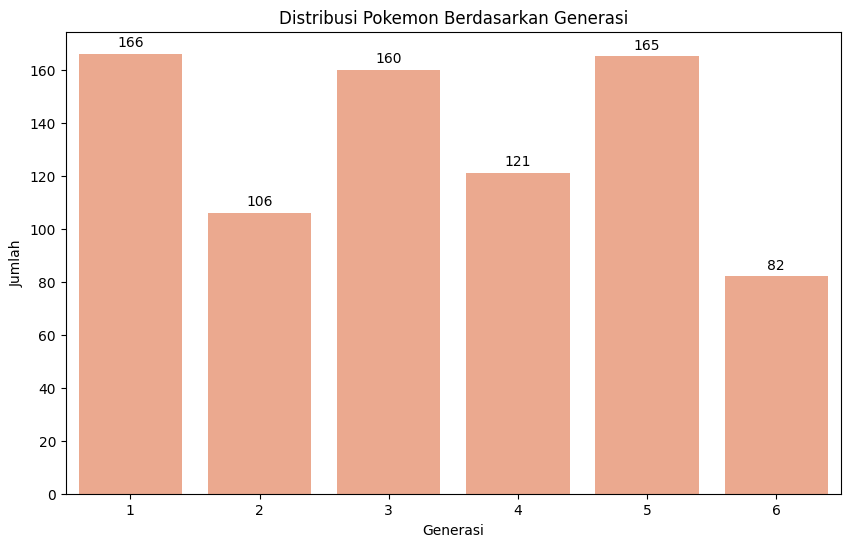

In [160]:
# Menampilkan jumlah Pokemon berdasarkan generasi
generation_counts = df['Generation'].value_counts()

# Membuat countplot untuk distribusi Pokemon berdasarkan generasi
plt.figure(figsize=(10, 6))  # Sesuaikan ukuran figur sesuai kebutuhan
ax = sns.countplot(x='Generation', data=df, color='#faa380')
plt.title('Distribusi Pokemon Berdasarkan Generasi')
plt.xlabel('Generasi')
plt.ylabel('Jumlah')

# Menambahkan label dengan jumlah di atas setiap batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3),  # Offset label dari batang
                textcoords='offset points',
                ha='center',
                va='bottom')

plt.show()

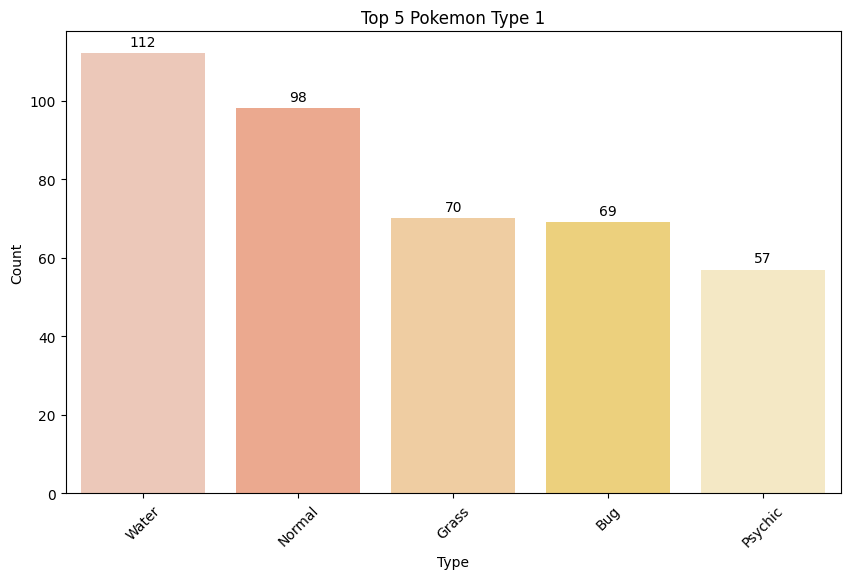

In [163]:
# Menghitung jumlah Pokemon berdasarkan tipe di kolom 'Type1' dan menampilkan 5 tipe terbanyak
type_counts = df['Type1'].value_counts().head(5)

# Menentukan palet warna untuk barplot
palette = ['#f4c5b1','#faa380','#fccf95','#ffd96a','#fcecbd']

# Membuat barplot untuk 5 tipe Pokemon teratas di kolom 'Type1'
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=type_counts.index, y=type_counts.values, palette=palette, hue=type_counts.index, legend=False)

# Menambahkan label dengan jumlah di atas setiap batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3),  # Offset label dari batang
                textcoords='offset points',
                ha='center',
                va='bottom')

# Menambahkan judul dan label sumbu
plt.title('Top 5 Pokemon Type 1')
plt.xlabel('Type')
plt.ylabel('Count')

# Menyesuaikan tampilan label x
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

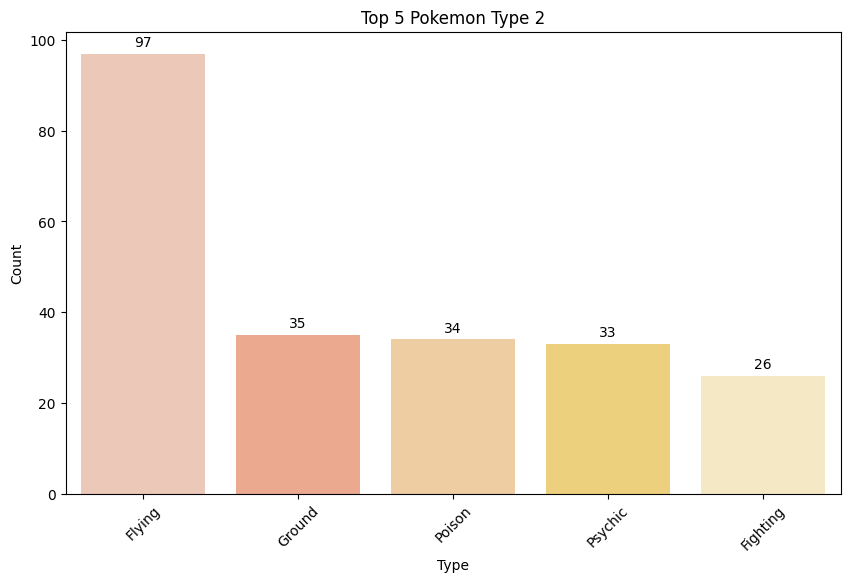

In [164]:
# Menghitung jumlah Pokemon berdasarkan tipe di kolom 'Type2' (mengabaikan 'None') dan menampilkan 5 tipe terbanyak
type_counts = df['Type2'][df['Type2'] != 'None'].value_counts().head(5)

# Membuat barplot untuk 5 tipe Pokemon teratas di kolom 'Type2'
palette = ['#f4c5b1','#faa380','#fccf95','#ffd96a','#fcecbd']
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=type_counts.index, y=type_counts.values, palette=palette, hue=type_counts.index, legend=False)

# Menambahkan label dengan jumlah di atas setiap batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3),  # Offset label dari batang
                textcoords='offset points',
                ha='center',
                va='bottom')

plt.title('Top 5 Pokemon Type 2')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

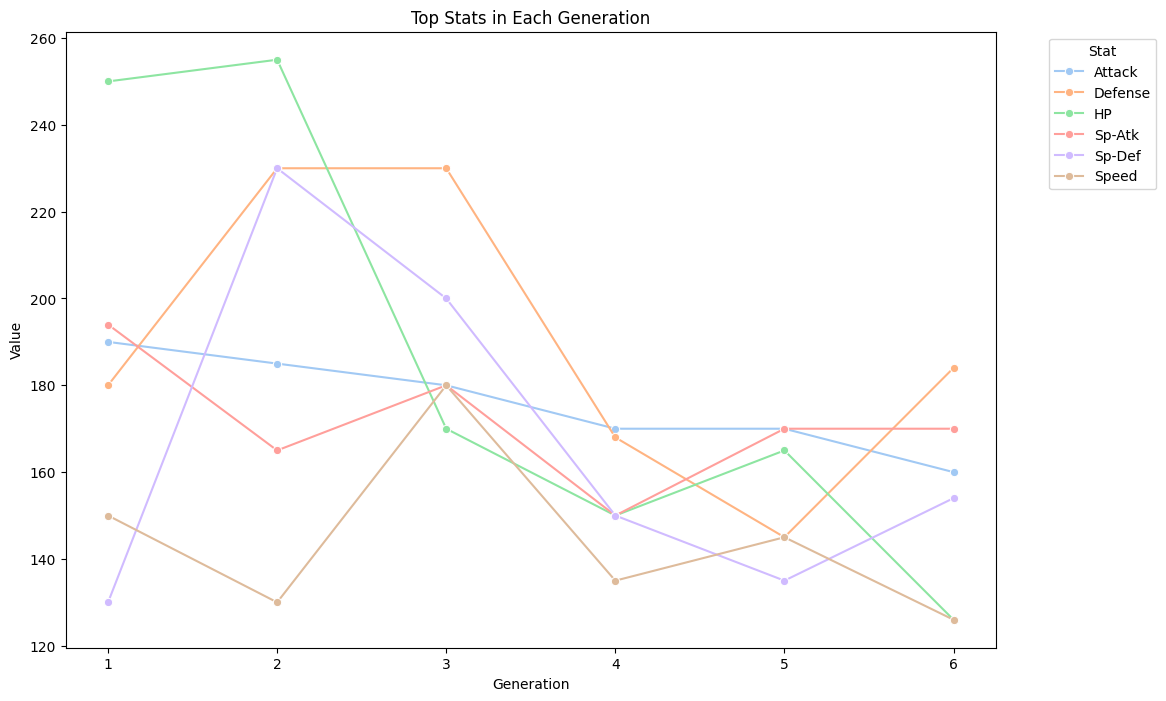

In [66]:
# Mengubah data menjadi format long untuk plot
df_long = df.melt(id_vars=['Generation'], value_vars=['HP', 'Attack', 'Defense', 'Sp-Atk', 'Sp-Def', 'Speed'],
                  var_name='Stat', value_name='Value')

# Menghitung nilai maksimum untuk setiap stat dalam setiap generasi
df_max = df_long.groupby(['Generation', 'Stat'])['Value'].max().reset_index()

# Membuat line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_max, x='Generation', y='Value', hue='Stat', marker='o', palette='pastel')

plt.title('Top Stats in Each Generation')
plt.xlabel('Generation')
plt.ylabel('Value')
plt.legend(title='Stat', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [87]:
# Menemukan Pokemon dengan nilai HP tertinggi secara keseluruhan
top_hp_pokemon = df.loc[df['HP'].idxmax()][['Name', 'Generation', 'HP']]

# Menampilkan Pokemon dengan HP tertinggi
print(top_hp_pokemon)

Name          Blissey
Generation          2
HP                255
Name: 242, dtype: object


In [192]:
# Temukan dan urutkan Pokemon dengan nilai HP tertinggi di setiap generasi
top_hp_pokemon = df.loc[df.groupby('Generation')['HP'].idxmax()].sort_values(by='HP', ascending=False)[['Name', 'Generation', 'HP']]

# Tampilkan Pokemon dengan HP tertinggi
print(top_hp_pokemon)

          Name  Generation   HP
#                              
242    Blissey           2  255
113    Chansey           1  250
321    Wailord           3  170
594  Alomomola           5  165
426   Drifblim           4  150
716    Xerneas           6  126


In [189]:
# Mengurutkan DataFrame berdasarkan kolom 'Attack' secara menurun dan mengambil baris pertama
top_attack_pokemon = df.sort_values(by='Attack', ascending=False).iloc[0][['Name', 'Generation', 'Attack']]

# Menampilkan Pokemon dengan HP tertinggi
print(top_attack_pokemon)

Name          MewtwoMega Mewtwo X
Generation                      1
Attack                        190
Name: 150, dtype: object


In [193]:
# Temukan Pokemon dengan nilai Attack tertinggi di setiap generasi
top_attack_pokemon = df.loc[df.groupby('Generation')['Attack'].idxmax()].sort_values(by='Attack', ascending=False).drop_duplicates('Generation')

# Tampilkan Pokemon dengan Attack tertinggi di setiap generasi
print(top_attack_pokemon[['Name', 'Generation', 'Attack']])

                        Name  Generation  Attack
#                                               
150      MewtwoMega Mewtwo X           1     190
214  HeracrossMega Heracross           2     185
383    GroudonPrimal Groudon           3     180
445    GarchompMega Garchomp           4     170
646       KyuremBlack Kyurem           5     170
719      DiancieMega Diancie           6     160


In [204]:
# Mengurutkan DataFrame berdasarkan kolom 'Defense' secara menurun dan mengambil baris pertama
top_defense_pokemon = df.sort_values(by='Defense', ascending=False).iloc[0][['Name', 'Generation', 'Defense']]

# Menampilkan Pokemon dengan HP tertinggi
print(top_defense_pokemon)

Name          Shuckle
Generation          2
Defense           230
Name: 213, dtype: object


In [205]:
# Temukan Pokemon dengan nilai Defense tertinggi di setiap generasi
top_defense_pokemon = df.loc[df.groupby('Generation')['Defense'].idxmax()].sort_values(by='Attack', ascending=False).drop_duplicates('Generation')

# Tampilkan Pokemon dengan Defense tertinggi di setiap generasi
print(top_defense_pokemon[['Name', 'Generation', 'Defense']])

                    Name  Generation  Defense
#                                            
306    AggronMega Aggron           3      230
208  SteelixMega Steelix           2      230
713              Avalugg           6      184
80               Slowbro           1      110
411            Bastiodon           4      168
563           Cofagrigus           5      145


In [206]:
# Mengurutkan DataFrame berdasarkan kolom 'Sp-Atk' secara menurun dan mengambil baris pertama
top_SPA_pokemon = df.sort_values(by='Sp-Atk', ascending=False).iloc[0][['Name', 'Generation', 'Sp-Atk']]

# Menampilkan Pokemon dengan SP-Atk tertinggi
print(top_SPA_pokemon)

Name          MewtwoMega Mewtwo Y
Generation                      1
Sp-Atk                        194
Name: 150, dtype: object


In [217]:
# Mengurutkan DataFrame berdasarkan kolom 'Sp-Atk' secara menurun dan mengambil baris pertama
top_SPA_pokemon = df.sort_values(by='Sp-Atk', ascending=False)[['Name', 'Generation', 'Sp-Atk']].drop_duplicates('Generation')

# Menampilkan Pokemon dengan SP-Atk tertinggi
print(top_SPA_pokemon)

                      Name  Generation  Sp-Atk
#                                             
150    MewtwoMega Mewtwo Y           1     194
382    KyogrePrimal Kyogre           3     180
646     KyuremWhite Kyurem           5     170
720     HoopaHoopa Unbound           6     170
181  AmpharosMega Ampharos           2     165
483                 Dialga           4     150


In [126]:
# Mengurutkan DataFrame berdasarkan kolom 'Sp-Def' secara menurun dan mengambil baris pertama
top_SPD_pokemon = df.sort_values(by='Sp-Def', ascending=False).iloc[0][['Name', 'Generation', 'Sp-Def']]

# Menampilkan Pokemon dengan HP tertinggi
print(top_SPD_pokemon)

Name          Shuckle
Generation          2
Sp-Def            230
Name: 213, dtype: object


In [248]:
# Temukan Pokémon dengan nilai SP Def tertinggi di setiap generasi
top_SPD_pokemon = df.loc[df.groupby('Generation')['Sp-Def'].idxmax()].sort_values(by='Attack', ascending=True).drop_duplicates('Generation')

# Tampilkan Pokémon dengan Attack tertinggi di setiap generasi
print(top_SPD_pokemon[['Name', 'Generation', 'Sp-Def']])

          Name  Generation  Sp-Def
#                                 
213    Shuckle           2     230
378     Regice           3     200
615  Cryogonal           5     135
476  Probopass           4     150
671    Florges           6     154
130   Gyarados           1     100


In [127]:
# Mengurutkan DataFrame berdasarkan kolom 'Speed' secara menurun dan mengambil baris pertama
top_Speed_pokemon = df.sort_values(by='Speed', ascending=False).iloc[0][['Name', 'Generation', 'Speed']]

# Menampilkan Pokemon dengan HP tertinggi
print(top_Speed_pokemon)

Name          DeoxysSpeed Forme
Generation                    3
Speed                       180
Name: 386, dtype: object


In [228]:
# Temukan Pokémon dengan nilai Speed tertinggi di setiap generasi dan urutkan berdasarkan nilai Speed dari tertinggi ke terendah
top_speed_pokemon = df.loc[df.groupby('Generation')['Speed'].idxmax()].sort_values(by='Speed', ascending=False).drop_duplicates('Generation')

# Tampilkan Pokémon dengan Speed tertinggi di setiap generasi
print(top_speed_pokemon[['Name', 'Generation', 'Speed']])

                      Name  Generation  Speed
#                                            
386      DeoxysSpeed Forme           3    180
65   AlakazamMega Alakazam           1    150
617               Accelgor           5    145
428    LopunnyMega Lopunny           4    135
169                 Crobat           2    130
663             Talonflame           6    126


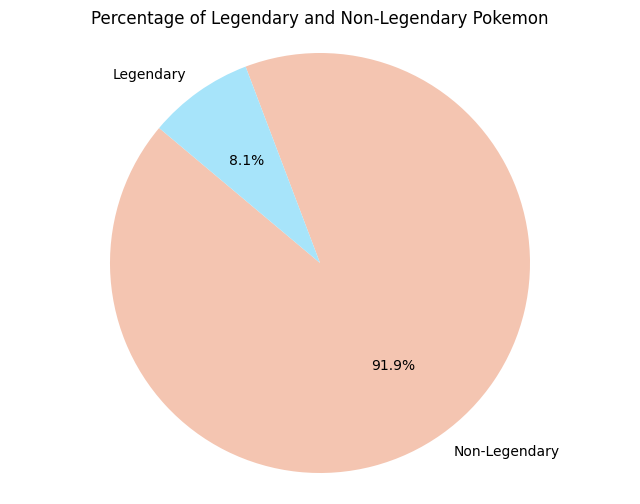

In [249]:

# Hitung jumlah Pokémon legendaris dan non legendaris
legendary_counts = df['Legendary'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 6))
labels = ['Non-Legendary', 'Legendary']
sizes = legendary_counts.values
colors = ['#f4c5b1', '#a7e4fa']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Legendary and Non-Legendary Pokemon')
plt.axis('equal')  # Pastikan pie chart berbentuk bulat
plt.show()

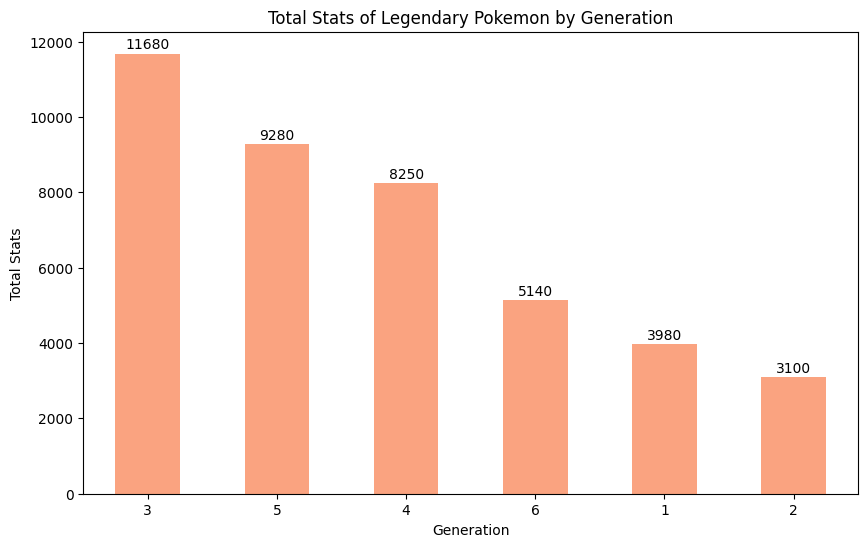

In [245]:
# Hitung jumlah 'Total' dari Pokémon legendaris di setiap generasi dan urutkan secara menurun
legendary_counts = df[df['Legendary']].groupby('Generation')['Total'].sum().sort_values(ascending=False)

# Tampilkan barchart
plt.figure(figsize=(10, 6))
legendary_counts.plot(kind='bar', color='#faa380')
plt.title('Total Stats of Legendary Pokemon by Generation')
plt.xlabel('Generation')
plt.ylabel('Total Stats')
plt.xticks(rotation=0)

# Menambahkan label total pada setiap batang
for index, value in enumerate(legendary_counts):
    plt.text(index, value + 50, int(value), ha='center', va='bottom')

plt.show()

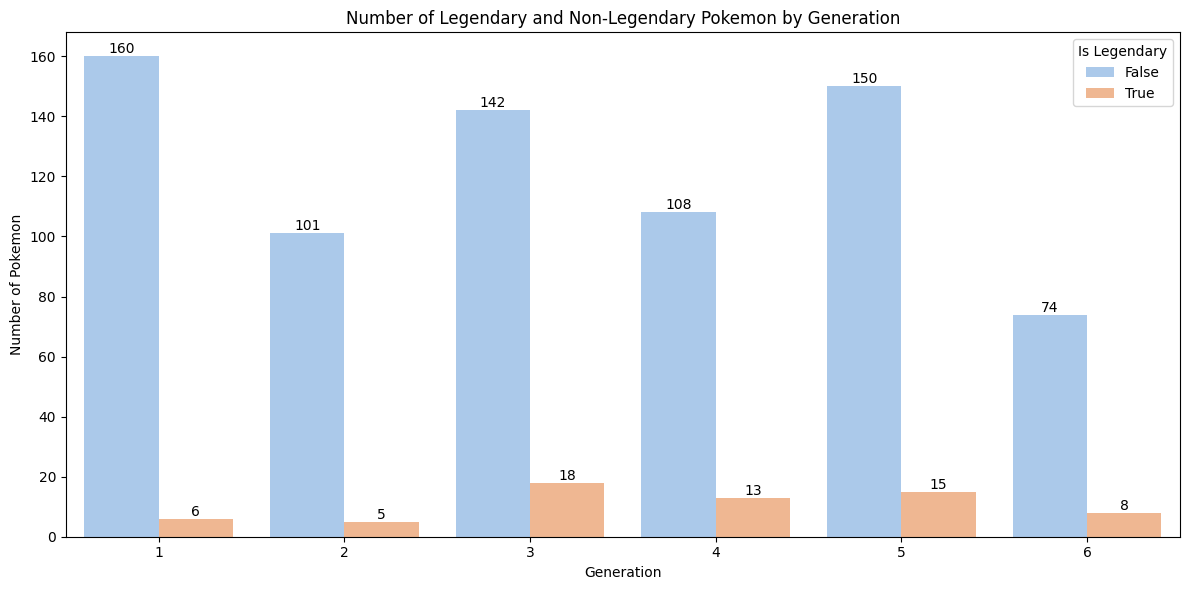

In [252]:
# Hitung jumlah Pokémon berdasarkan 'Generation' dan 'Legendary'
counts = df.groupby(['Generation', 'Legendary']).size().reset_index(name='Count')

# Membuat barplot menggunakan seaborn
plt.figure(figsize=(12, 6))
bars = sns.barplot(data=counts, x='Generation', y='Count', hue='Legendary', palette='pastel')
plt.title('Number of Legendary and Non-Legendary Pokemon by Generation')
plt.ylabel('Number of Pokemon')
plt.xlabel('Generation')
plt.legend(title='Is Legendary')

# Menambahkan label dengan jumlah tertentu di atas setiap bar
for container in bars.containers:
    bars.bar_label(container, fmt='%d')

plt.tight_layout()  # Menyesuaikan layout untuk menghindari label terpotong
plt.show()

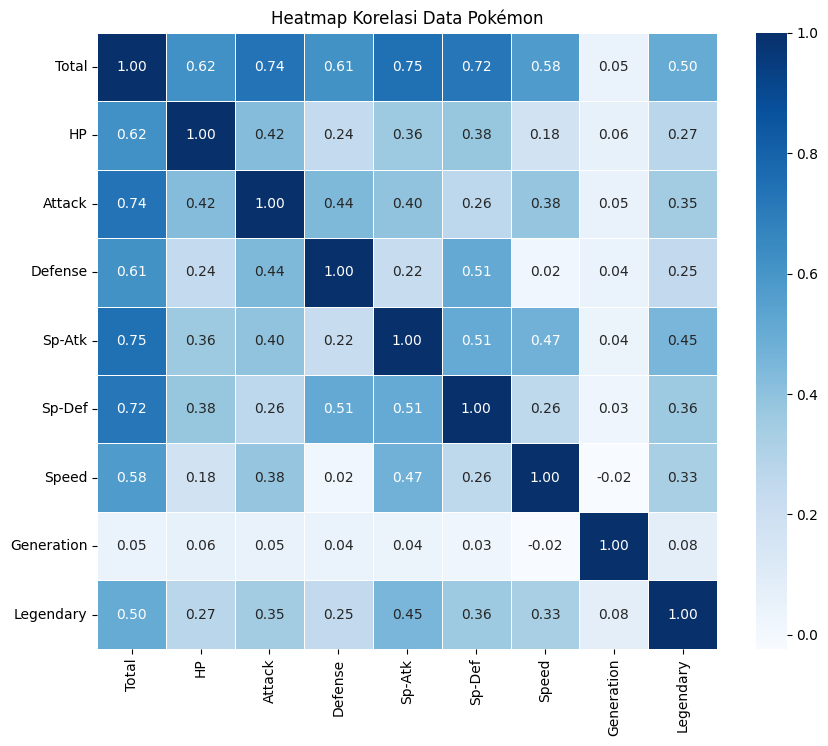

In [251]:
# Menghitung matriks korelasi hanya untuk kolom numerik
corr = df.corr(numeric_only=True)

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)

# Menambahkan judul
plt.title('Heatmap Korelasi Data Pokémon')

# Menampilkan heatmap
plt.show()

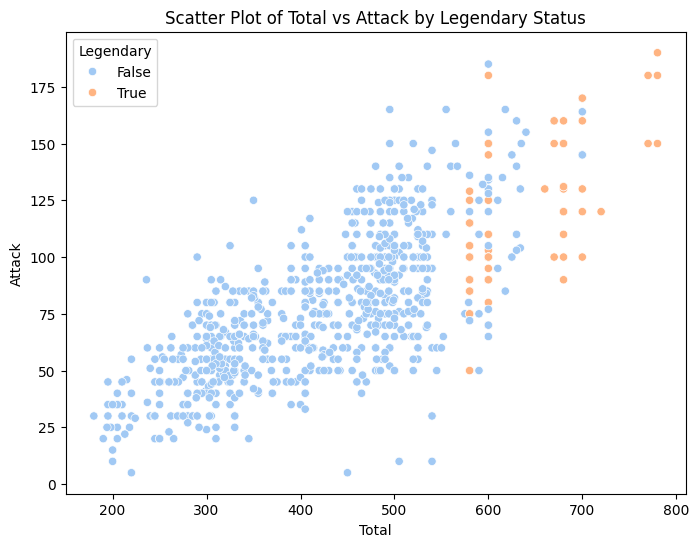

In [148]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Total', y='Attack', hue='Legendary', palette='pastel')

# Menambahkan judul dan label
plt.title('Scatter Plot of Total vs Attack by Legendary Status')
plt.xlabel('Total')
plt.ylabel('Attack')

# Menambahkan legenda dengan judul
plt.legend(title='Legendary')

# Menampilkan plot
plt.show()

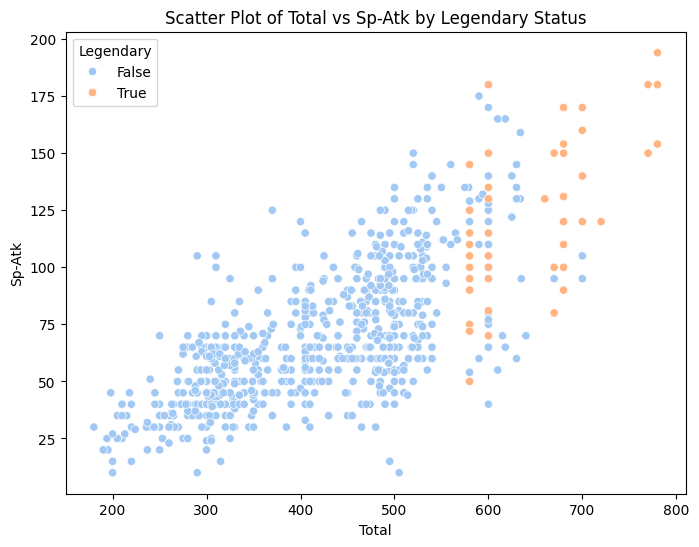

In [151]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))  # Menentukan ukuran gambar
sns.scatterplot(data=df, x='Total', y='Sp-Atk', hue='Legendary', palette='pastel')

# Menambahkan judul dan label
plt.title('Scatter Plot of Total vs Sp-Atk by Legendary Status')
plt.xlabel('Total')
plt.ylabel('Sp-Atk')

# Menambahkan legenda dengan judul
plt.legend(title='Legendary')

# Menampilkan plot
plt.show()